**Modern Portfolio Theory (MPT)**

In [1]:
# !pip install empyrial

In [2]:
from empyrial import empyrial, Engine
import pandas as pd
import re

In [21]:
# From universe of stocks, categorize by beta(SPY,Xi) and Corr(SPY,Xi)
list_tickers = ['PHM', 'XOM', 'TXN', 'AMZN', 'BBWI', 'CBOE', 'ECL', 'GE', 'GOOGL', 'KO', 'LDOS', 'MET', 'META', 'MMC', 'MRK', 'MTB', 'SPY', 'QQQ', 'TRGP', 'USB', 'VRTX', 'WDC', 'WFC', 'WRK']


In [22]:
len(list_tickers)

24

In [23]:
date_today = pd.to_datetime('today').strftime("%Y-%m-%d")
date_start = pd.to_datetime(date_today) - pd.DateOffset(months=36)
date_start = date_start.strftime("%Y-%m-%d")
date_start, date_today

('2021-06-20', '2024-06-20')

In [24]:
portfolio = Engine(
    start_date = date_start,                                      
    portfolio = list_tickers,
    benchmark = ["SPY"],
    optimizer = "MINVAR", 
    rebalance = "monthly"
)

Start date: 2021-06-20
End date: 2024-06-20


,Backtest
,
Annual return,16.87%
Cumulative return,59.32%
Annual volatility,16.62 %
Winning day ratio,54.32%
Sharpe ratio,1.02
Calmar ratio,1.04
Information ratio,0.0
Stability,0.67
Max Drawdown,-16.16 %


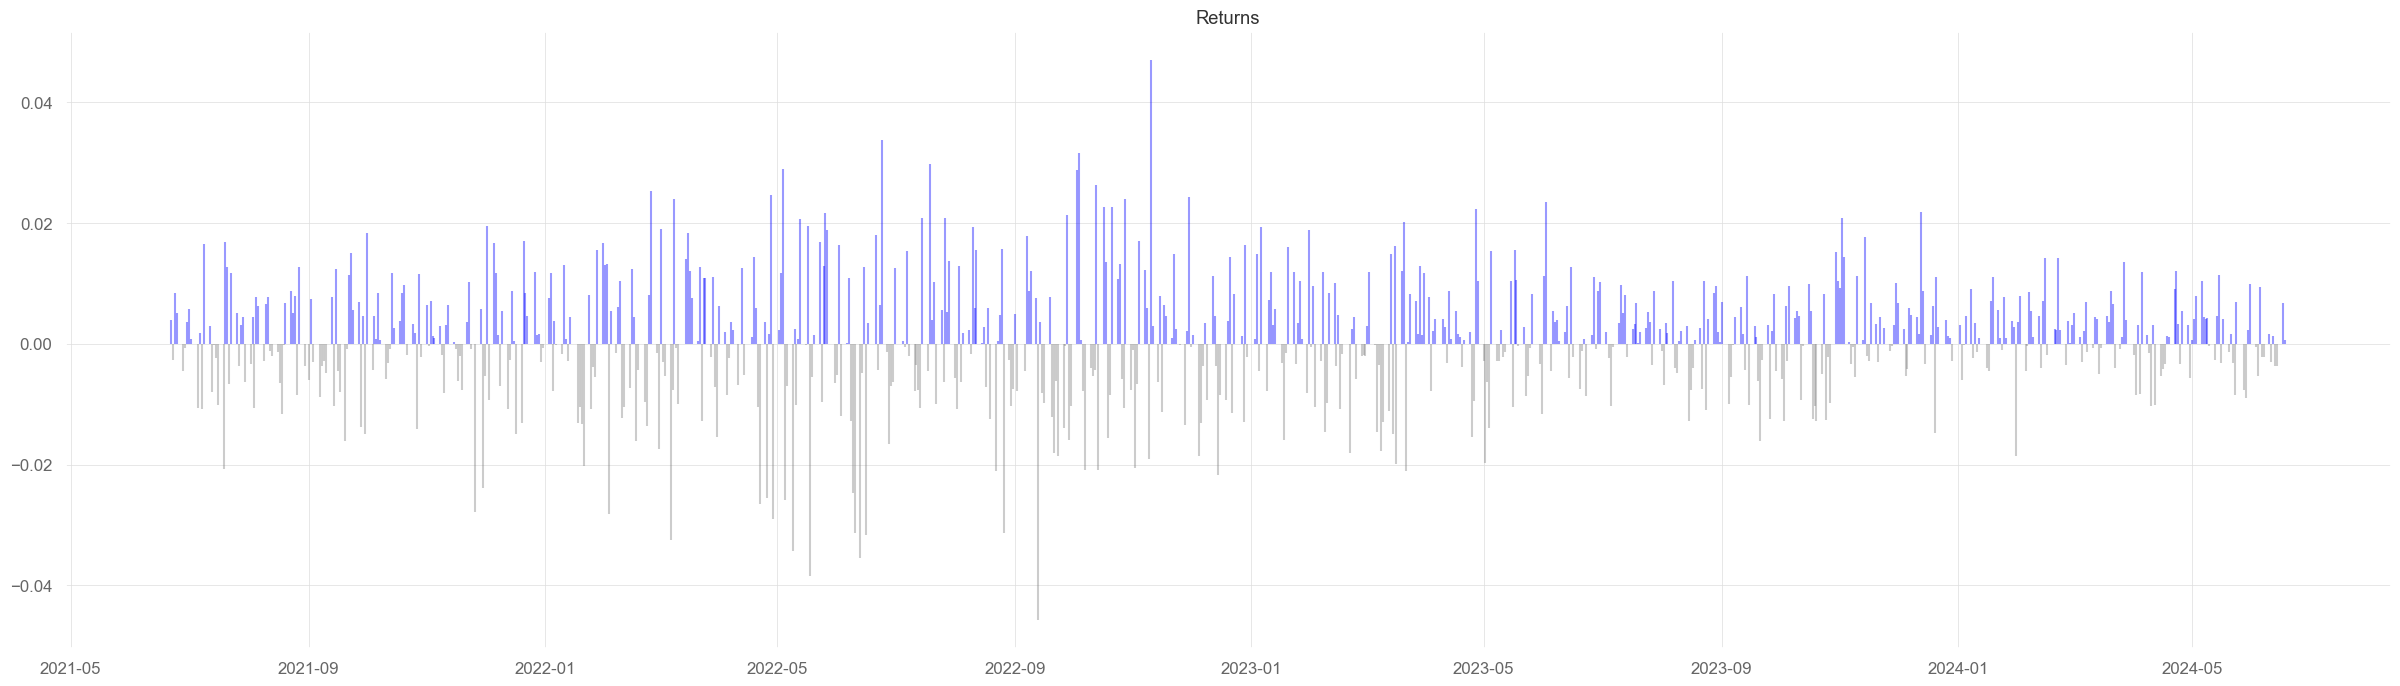

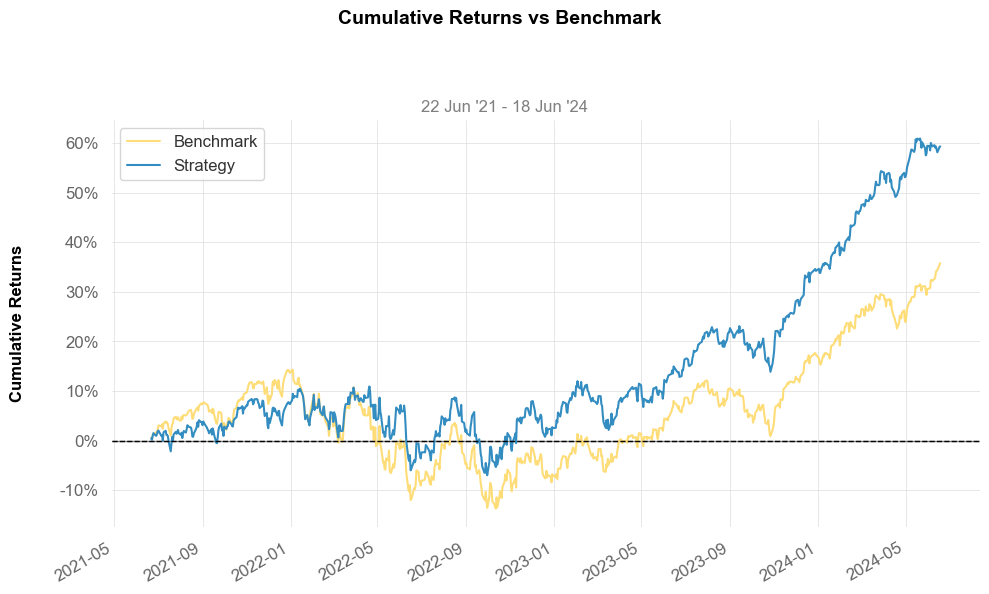

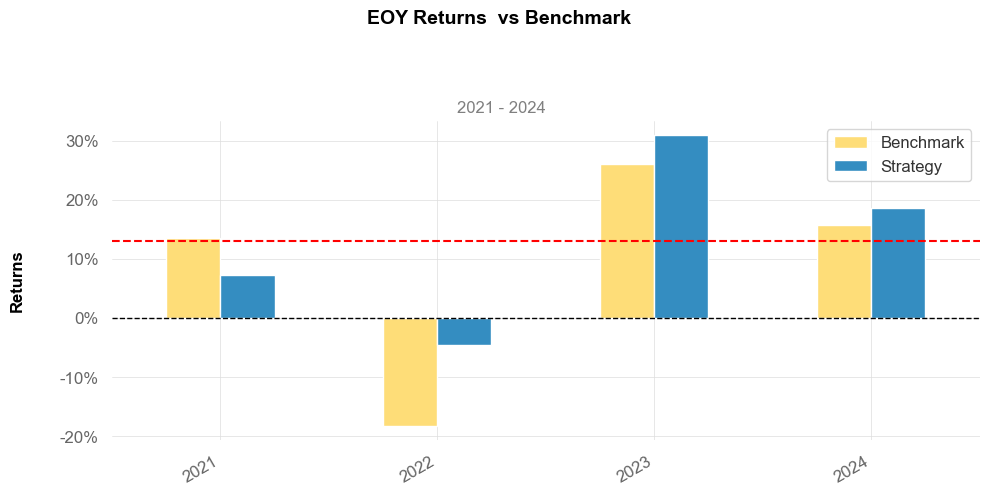

In [25]:
try:
    empyrial(portfolio)
except TypeError as e:
    pass 

# Summary of allocations

In [26]:
df_alloc = empyrial.orderbook
print("Hypothetical allocations over time: ")
df_alloc

Hypothetical allocations over time: 


,2021-07-20,2021-08-19,2021-09-19,2021-10-19,2021-11-19,2021-12-19,2022-01-18,2022-02-18,2022-03-20,2022-04-20,...,2023-10-19,2023-11-19,2023-12-19,2024-01-18,2024-02-18,2024-03-19,2024-04-19,2024-05-19,2024-06-19,2024-06-20
PHM,0.04031,0.03766,0.03808,0.03804,0.03908,0.03793,0.03675,0.03574,0.03362,0.03317,...,0.03376,0.03340,0.03341,0.03364,0.03378,0.03386,0.03368,0.03352,0.03351,0.03351
XOM,0.03859,0.03669,0.03509,0.03516,0.03652,0.03631,0.03661,0.04104,0.04957,0.05010,...,0.04946,0.04959,0.04951,0.04944,0.04927,0.04924,0.04931,0.04927,0.04907,0.04907
TXN,0.05036,0.04492,0.04570,0.04396,0.04287,0.04376,0.04334,0.04116,0.04232,0.04178,...,0.04179,0.04159,0.04145,0.04131,0.04135,0.04137,0.04122,0.04106,0.04105,0.04105
AMZN,0.05774,0.05039,0.05077,0.04896,0.04791,0.04851,0.04777,0.04246,0.04048,0.03987,...,0.03098,0.03127,0.03174,0.03194,0.03212,0.03224,0.03247,0.03263,0.03302,0.03302
BBWI,0.02341,0.02967,0.03271,0.03166,0.03224,0.03315,0.03427,0.03112,0.02742,0.02690,...,0.02600,0.02594,0.02598,0.02625,0.02650,0.02696,0.02700,0.02707,0.02714,0.02714
CBOE,0.04715,0.04535,0.04841,0.04988,0.04835,0.04852,0.04905,0.04963,0.05111,0.05056,...,0.05784,0.05800,0.05789,0.05756,0.05750,0.05719,0.05710,0.05702,0.05670,0.05670
ECL,0.04559,0.04623,0.04698,0.04584,0.04516,0.04510,0.04588,0.04479,0.04275,0.04194,...,0.04162,0.04157,0.04165,0.04169,0.04209,0.04211,0.04217,0.04232,0.04229,0.04229
GE,0.02820,0.03274,0.03164,0.03284,0.03386,0.03260,0.03327,0.03389,0.03416,0.03481,...,0.03839,0.03856,0.03894,0.03886,0.03903,0.03896,0.03883,0.03858,0.03863,0.03863
GOOGL,0.04870,0.04543,0.04483,0.04344,0.04578,0.04510,0.04471,0.04265,0.04211,0.04146,...,0.03702,0.03698,0.03748,0.03772,0.03764,0.03771,0.03791,0.03788,0.03806,0.03806
KO,0.05273,0.04914,0.04967,0.05081,0.05085,0.05039,0.05092,0.05509,0.05621,0.05614,...,0.05934,0.05935,0.05911,0.05869,0.05850,0.05817,0.05785,0.05763,0.05737,0.05737


In [27]:
print("Summary of the portfolio at the most recent date:") 
df_alloc_today = pd.DataFrame(df_alloc.iloc[:,-1])
df_alloc_today

Summary of the portfolio at the most recent date:


,2024-06-20
PHM,0.03351
XOM,0.04907
TXN,0.04105
AMZN,0.03302
BBWI,0.02714
CBOE,0.05670
ECL,0.04229
GE,0.03863
GOOGL,0.03806
KO,0.05737
